# VIDEO GAME SALES DATASET

In this project, we will explore and analyze a dataset containing information about video games with sales. The dataset was generated by scraping data from vgchartz.com, a popular source for video game sales data.

**Tools Used:**

For this Analysis, we will be using the following Python libraries:

**Numpy** for numerical operations and calculations.

**Pandas** for data manipulation and analysis.

**Matplotlib** for data visualization.

**Seaborn** for creating informative and attractive statistical graphics.

Throughout this project, we will provide step-by-step code examples and visualizations to understand the data analysis process thoroughly. By the end of this project, we will have a comprehensive understanding of how to perform Data analysis on video game sales data using Python's data science libraries.



# Dataset Description

The dataset comprises essential information including:

**Rank**: Hierarchical position based on overall sales.

**Name**: Title of the video game.

**Platform**: Release platform (e.g., PC, PS4, Xbox One).

**Year**: Release year of the game.

**Genre**: Category of the video game (e.g., Action, Sports, RPG).

**Publisher**: Entity responsible for publishing the game.

**NA_Sales**: Sales in North America (in millions).

**EU_Sales**: Sales in Europe (in millions).

**JP_Sales**: Sales in Japan (in millions).

**Other_Sales**: Sales in other parts of the world (in millions).

**Global_Sales**: Combined worldwide sales (sum of regional sales).

The dataset encompasses 16,598 entries, with 2 incomplete records omitted.

# PREPARING THE DATA

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('vgsales.csv')

In [3]:
#Display the first five rows of the dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#Check for missing values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
#remove missing values
df = df.dropna()

In [7]:
#check again for missing values after removing them
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
#display descriptive statistics of numerical columns
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


- Concluding the data preprocessing.
- Missing values have been removed from 'Year' and 'Publisher' columns.
- The dataset is now cleaned and ready for further analysis and visualization.

# ANALYSIS AND VISUALISATION:

**1. Top Selling Games: What are the top 10 best-selling games of all time based on global sales?**

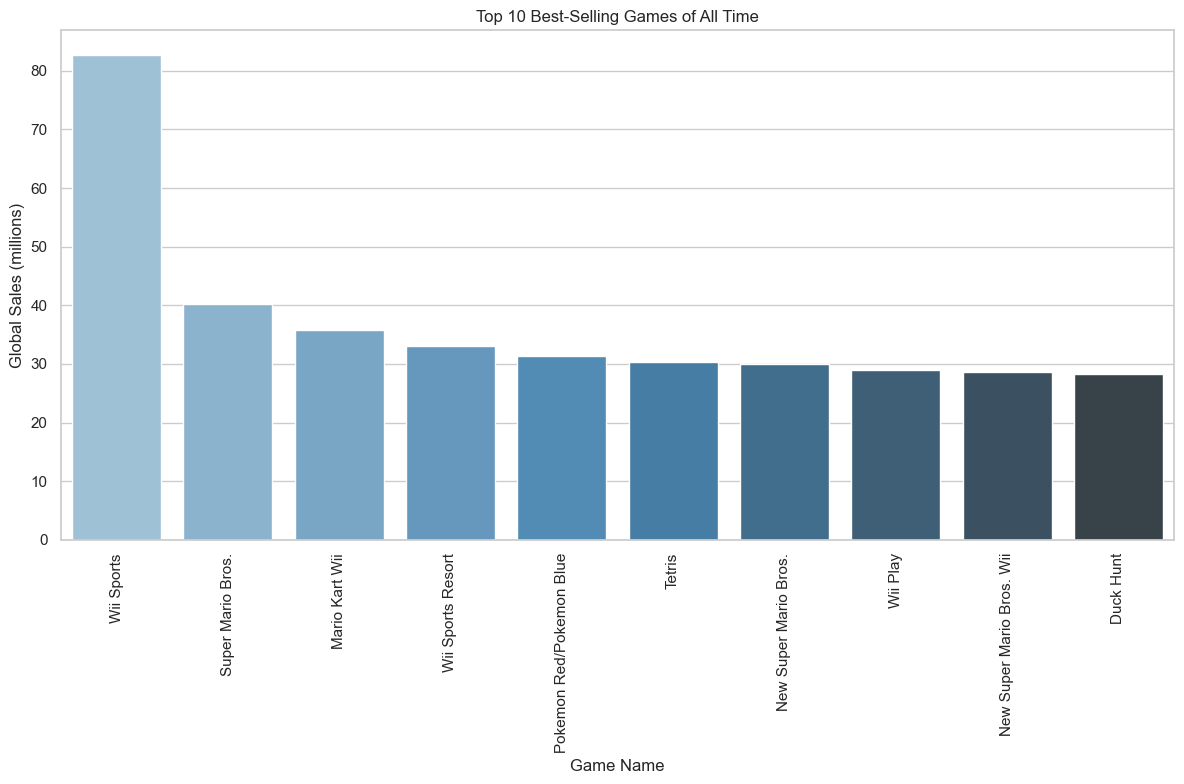

In [10]:
# Select the top 10 best-selling games
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Set up the plot size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
sns.barplot(data=top_10_games, x='Name', y='Global_Sales', palette='Blues_d')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (millions)')
plt.title('Top 10 Best-Selling Games of All Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**2. Sales by Platform: Which gaming platform (e.g., PC, PS4, Xbox, etc.) has the highest total sales?**

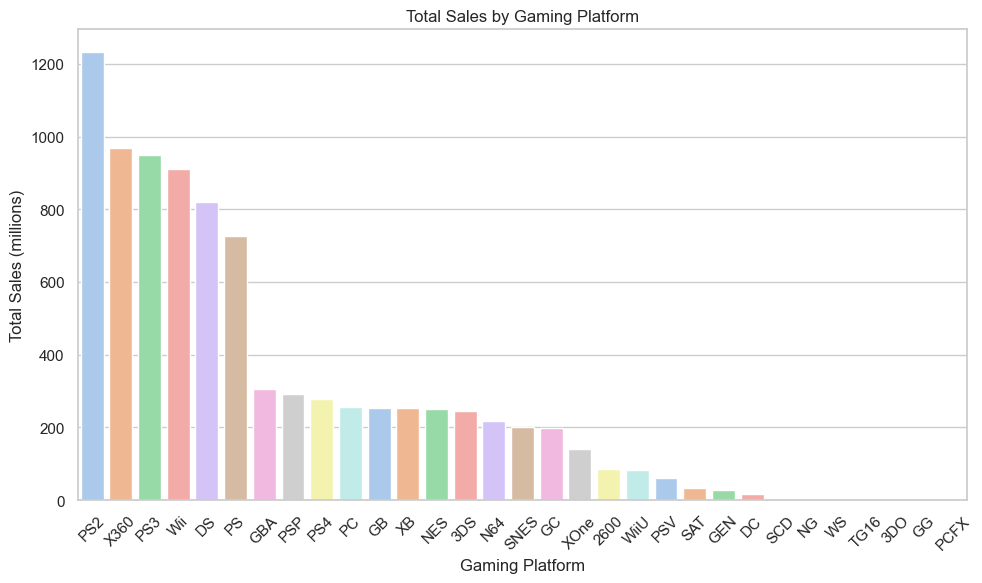

In [11]:
# Group the data by 'Platform' and calculate the sum of global sales for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sort the platforms based on total sales in descending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

# Set up the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
sns.barplot(data=platform_sales, x='Platform', y='Global_Sales', palette='pastel')
plt.xlabel('Gaming Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Gaming Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3. Genre Popularity: What are the most popular genres of video games in terms of global sales?**

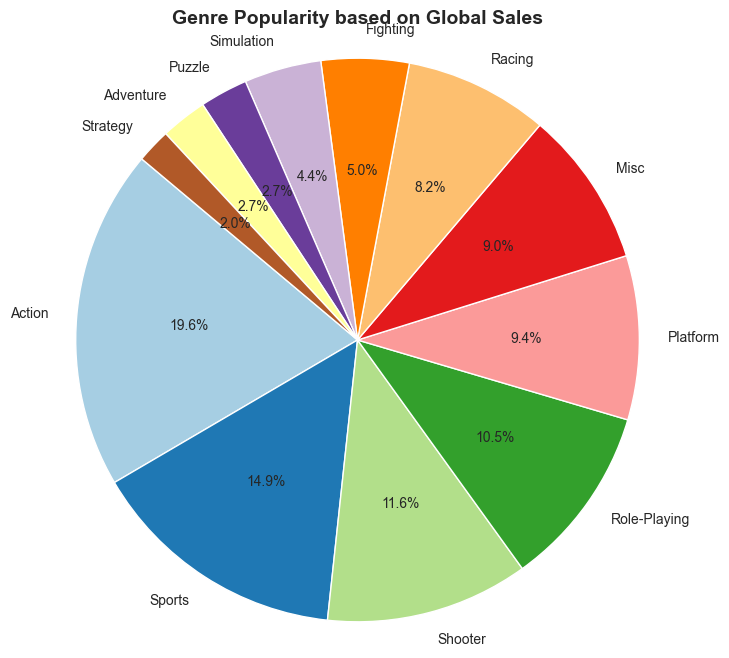

In [12]:
# Group the data by 'Genre' and calculate the sum of global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort the genres based on total sales in descending order
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

# Using matplotlib.pyplot to create a pie chart to visualize genre popularity
plt.figure(figsize=(8, 8))
plt.pie(genre_sales['Global_Sales'], labels=genre_sales['Genre'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 10})
plt.axis('equal')
plt.title('Genre Popularity based on Global Sales', fontsize=14, fontweight='bold')
plt.show()











**4. Sales by Region: Which region (North America, Europe, Japan, Rest of the World) contributes the most to global video game sales?**

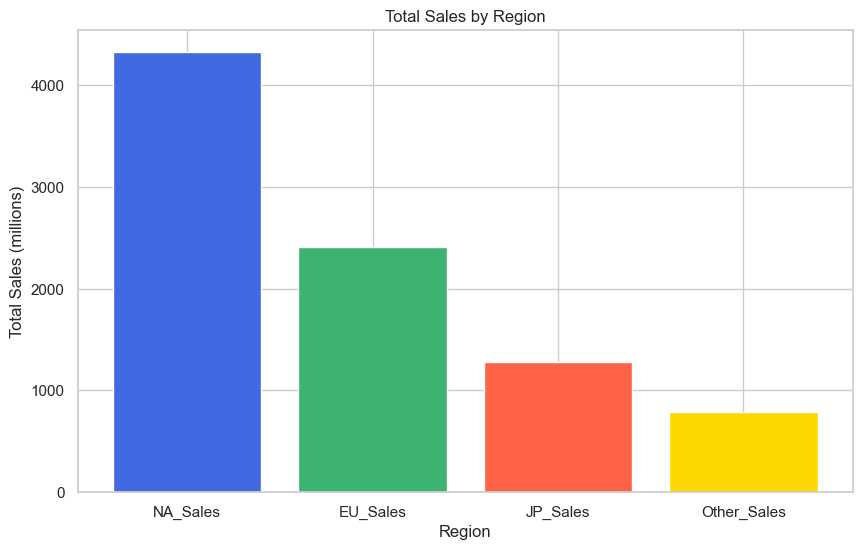

In [13]:
# Calculate the total sales for each region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create a stacked bar chart to visualize sales by region
plt.figure(figsize=(10, 6))
plt.bar(region_sales.index, region_sales.values, color=['royalblue', 'mediumseagreen', 'tomato', 'gold'])
plt.xlabel('Region')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Region')
plt.show()

**5. Publisher Performance: Which publishers have released the most successful games in terms of global sales?**

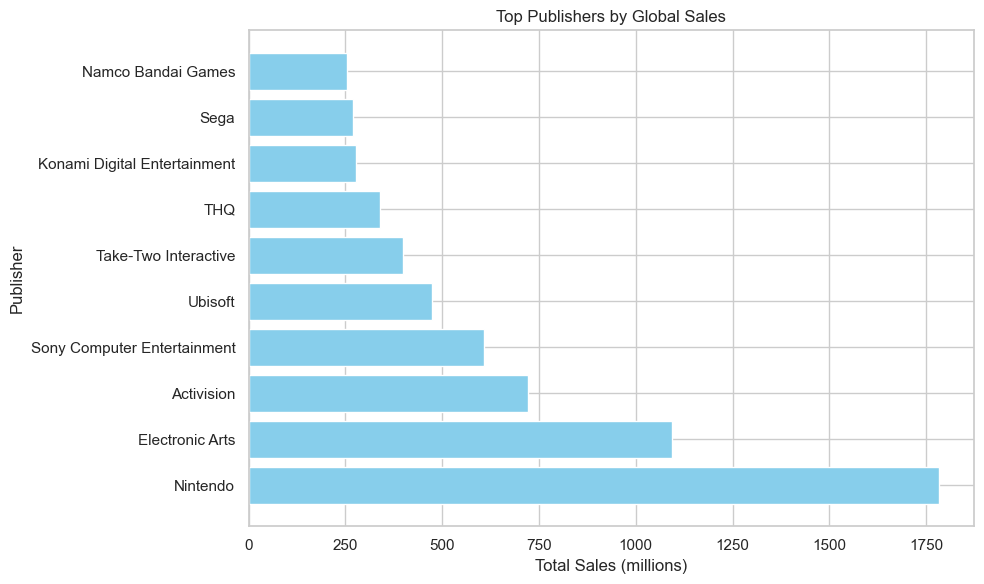

In [14]:
# Group data by 'Publisher' and calculate total global sales
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().reset_index()

# Sort and select top 10 publishers by global sales
publisher_sales = publisher_sales.sort_values(by='Global_Sales', ascending=False).head(10)

# Create horizontal bar chart for publisher performance
plt.figure(figsize=(10, 6))
plt.barh(publisher_sales['Publisher'], publisher_sales['Global_Sales'], color='skyblue')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Publisher')
plt.title('Top Publishers by Global Sales')

plt.tight_layout()  # Improve spacing between elements
plt.show()




**6. Yearly Sales Trends: How have video game sales evolved over the years? Are they increasing or decreasing?**

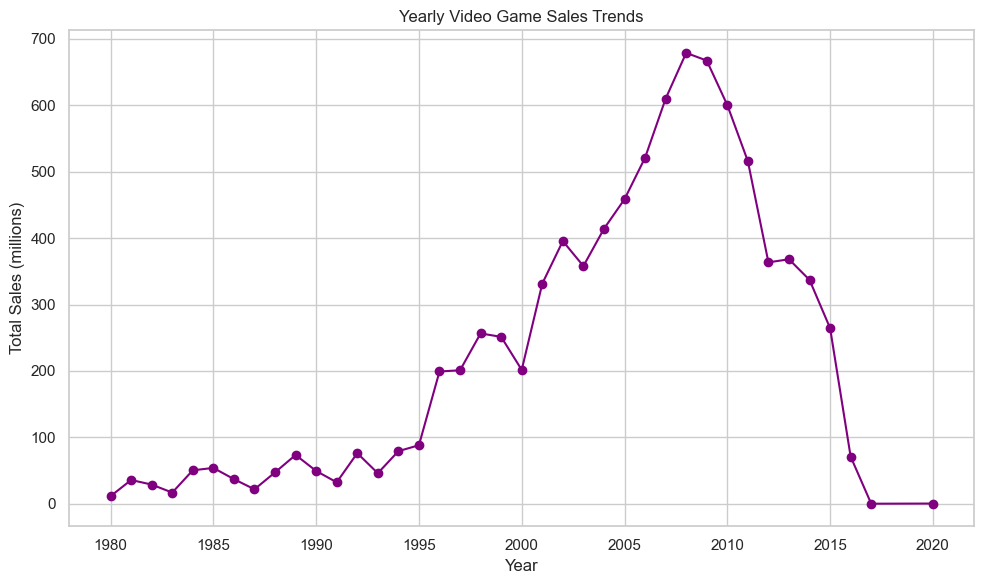

In [15]:
# Group data by 'Year' and calculate total global sales
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Create a line chart for yearly sales trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='purple')  # Line color changed to purple

# Chart labels and grid
plt.title('Yearly Video Game Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.grid(True, axis='y')  # Show horizontal grid lines

plt.tight_layout()
plt.show()


**7. Platform vs. Genre: Which genres are most popular on specific gaming platforms?**

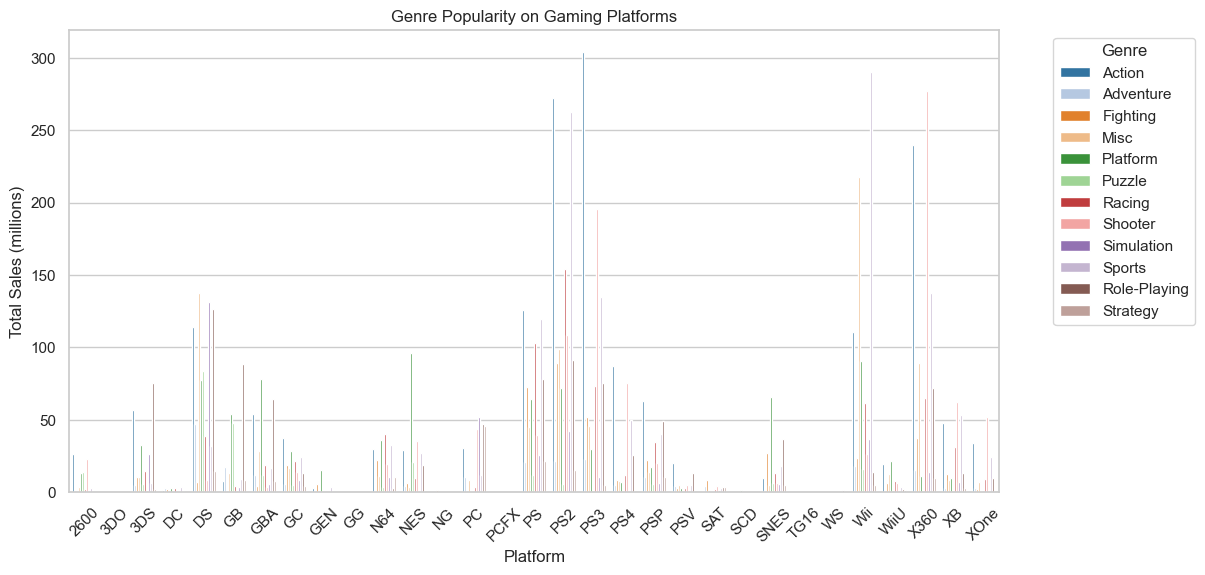

In [16]:
# Group the data by 'Platform' and 'Genre' and calculate the sum of global sales for each combination
platform_genre_sales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

# Create a grouped bar chart to visualize genre popularity on gaming platforms
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', hue='Genre', data=platform_genre_sales, palette='tab20')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Genre Popularity on Gaming Platforms')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


**8. Regional Sales Variation: Do certain genres or platforms perform better in specific regions?**

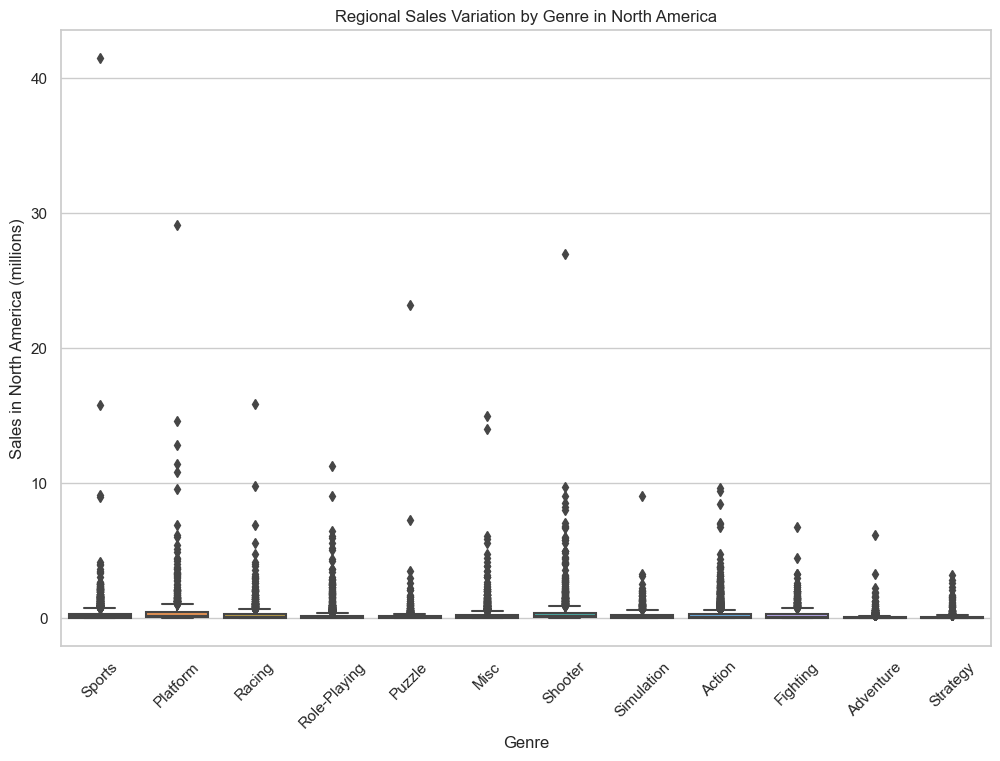

In [18]:
# Create box plots to visualize sales variation of genres and platforms in specific regions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='NA_Sales', data=df)
plt.xlabel('Genre')
plt.ylabel('Sales in North America (millions)')
plt.title('Regional Sales Variation by Genre in North America')
plt.xticks(rotation=45)
plt.show()

**9. Correlations: Are there any significant correlations between game sales and other factors like year of release, genre, or publisher?**


C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


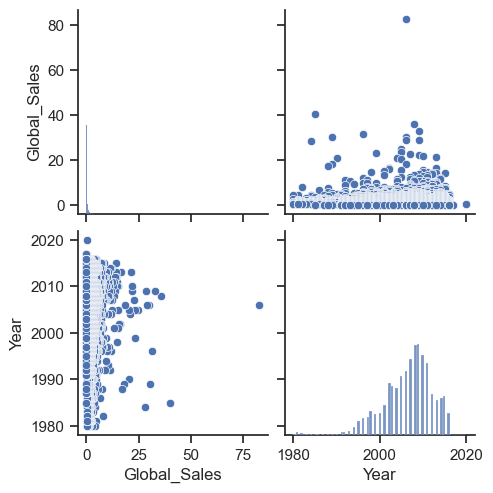

In [22]:
# Create a pairplot to visualize correlations between game sales, year of release, and publisher
sns.pairplot(df[['Global_Sales', 'Year', 'Publisher']])
plt.show()

**10. Distribution of Sales: What is the distribution of global sales across different games? Are sales concentrated in a few blockbuster titles, or is it more evenly spread?**

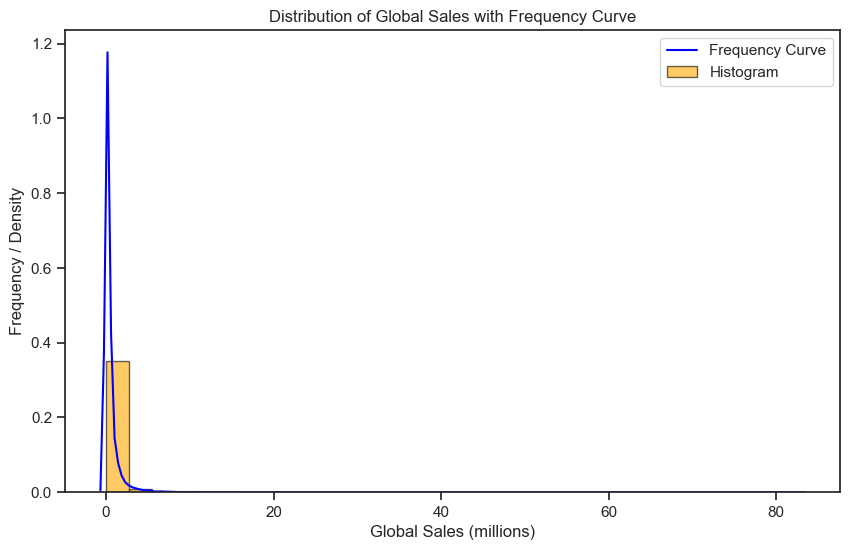

In [26]:
plt.figure(figsize=(10, 6))

# Create a histogram
plt.hist(df['Global_Sales'], bins=30, color='orange', edgecolor='black', density=True, alpha=0.6)

# Create a KDE plot (frequency curve)
sns.kdeplot(df['Global_Sales'], color='blue')

plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Global Sales with Frequency Curve')
plt.legend(['Frequency Curve', 'Histogram'])

plt.show()

**11. Sales Over Time: Can you identify any trends in sales for specific games or genres over time?**

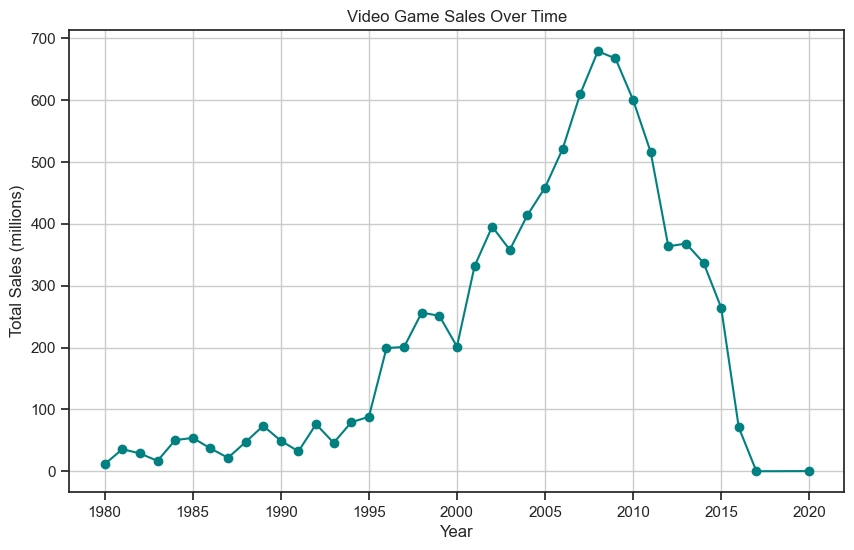

In [28]:
# Group the data by 'Year' and calculate the sum of global sales for each year
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Create a line plot to visualize the sales over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='teal')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.title('Video Game Sales Over Time')
plt.grid(True)
plt.show()


**12. Best-Selling Genres by Region: Are there any differences in the most popular genres for each region (NA, EU, JP)?**

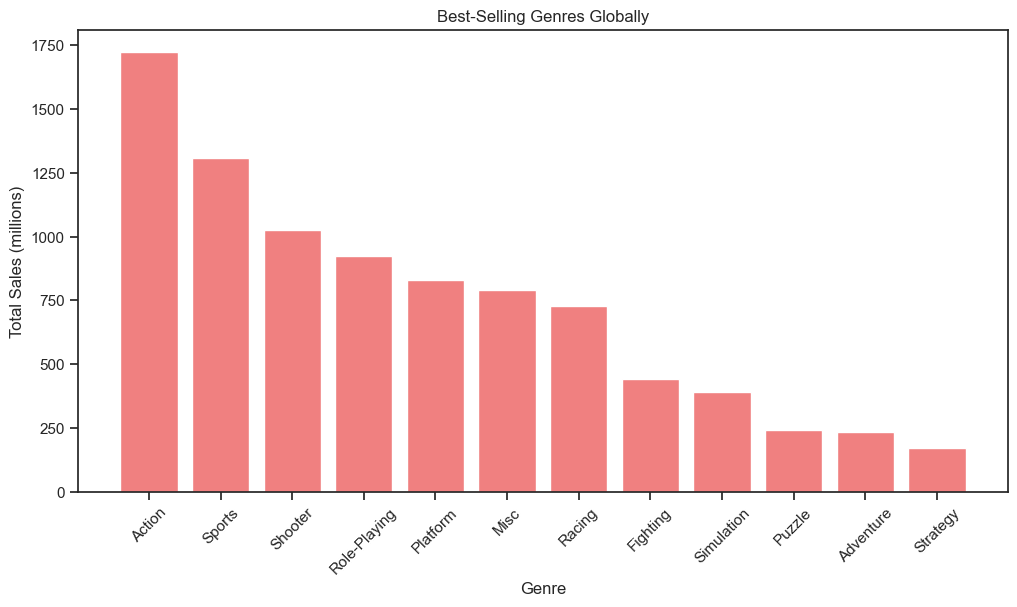

In [32]:
# Group the data by 'Genre' and calculate the sum of global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort the genres based on total sales in descending order
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

# Create a bar chart to visualize the best-selling genres globally
plt.figure(figsize=(12, 6))
plt.bar(genre_sales['Genre'], genre_sales['Global_Sales'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.title('Best-Selling Genres Globally')
plt.xticks(rotation=45)
plt.show()

**13. Yearly Sales by Region: How have the sales trends evolved over the years in each region?**

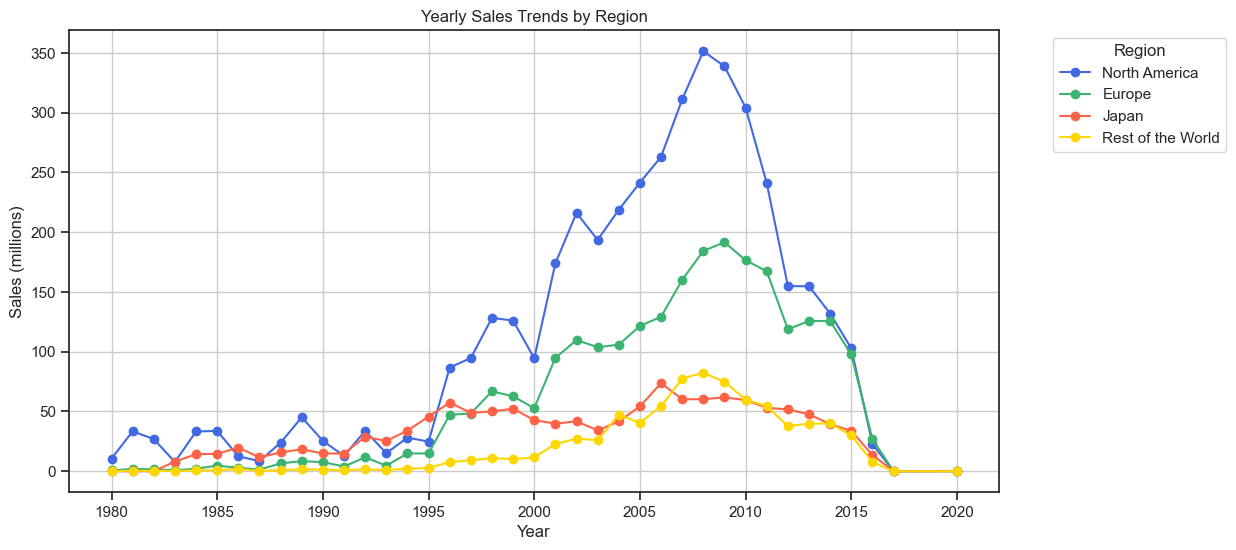

In [33]:
# Group the data by 'Year' and calculate the sum of sales for each region for every year
yearly_sales_by_region = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create line plots to visualize yearly sales trends in each region
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['NA_Sales'], label='North America', marker='o', color='royalblue')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['EU_Sales'], label='Europe', marker='o', color='mediumseagreen')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['JP_Sales'], label='Japan', marker='o', color='tomato')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['Other_Sales'], label='Rest of the World', marker='o', color='gold')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Yearly Sales Trends by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**14. Regional Market Share: What percentage of the global video game market do each of the regions hold?**

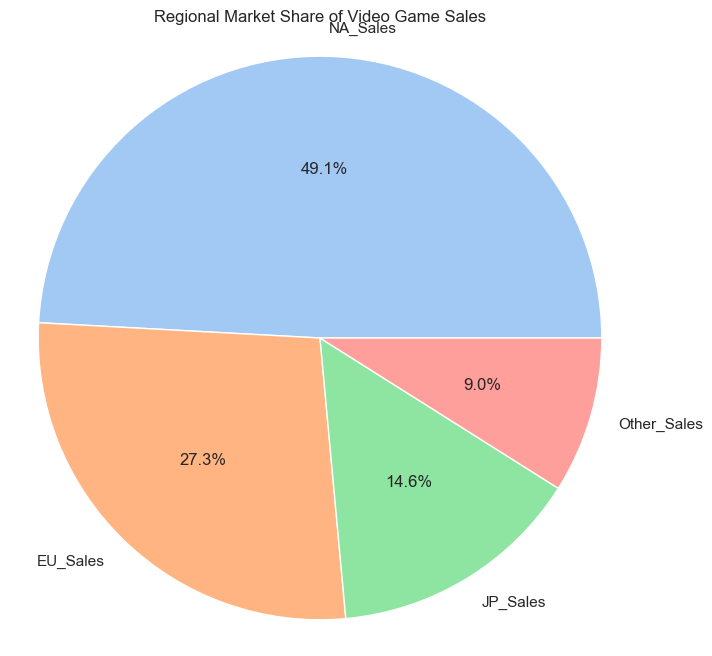

In [34]:
# Calculate the total global sales
total_global_sales = df['Global_Sales'].sum()

# Calculate the market share of each region
region_market_share = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum() / total_global_sales * 100

# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Create a pie chart to visualize the regional market share
plt.figure(figsize=(8, 8))
plt.pie(region_market_share, labels=region_market_share.index, autopct='%1.1f%%', colors=custom_palette)
plt.axis('equal')
plt.title('Regional Market Share of Video Game Sales')
plt.show()

**15. Platform Sales Comparison: Compare the sales performance of different platforms side by side.**

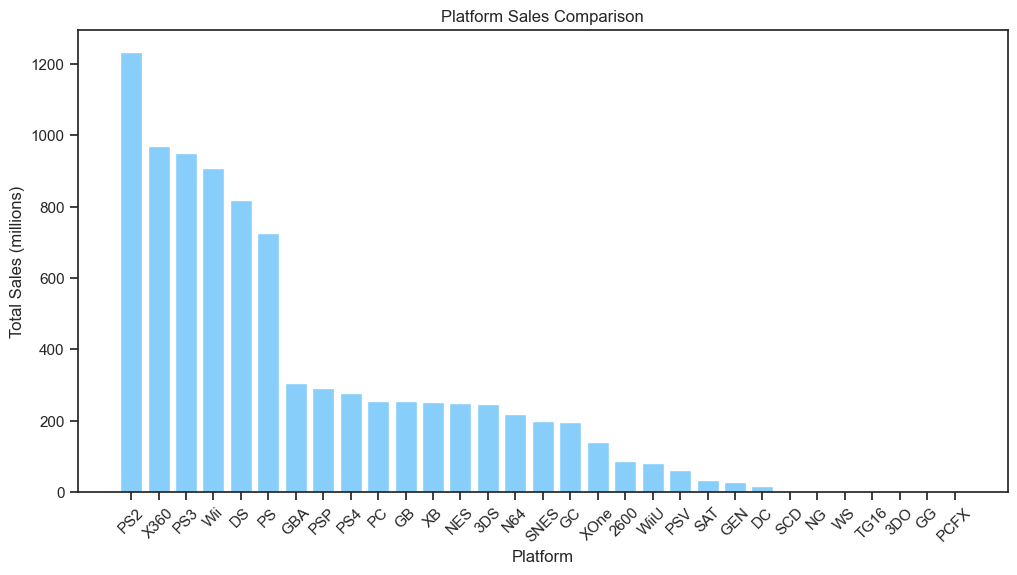

In [37]:
# Group the data by 'Platform' and calculate the sum of global sales for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sort the platforms based on total sales in descending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

# Create a grouped bar chart to compare platform sales
plt.figure(figsize=(12, 6))
plt.bar(platform_sales['Platform'], platform_sales['Global_Sales'], color='lightskyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Platform Sales Comparison')
plt.xticks(rotation=45)
ConclusionvConclusionplt.show()

# Conclusion


This VGSales analysis provided valuable insights into the video game industry, revealing top-performing games, popular genres, platform preferences, and trends over time.

These insights can be leveraged by game developers, publishers, and marketers to make informed decisions and tailor their strategies for greater success in the competitive gaming market.

Keep in mind that this analysis is based on the data available in the dataset, and further research or data collection may be required for more comprehensive conclusions.

The analysis can also be extended by incorporating additional external data sources or using advanced statistical techniques for deeper insights.